In [1]:
import sys
import warnings

import pandas as pd
import synthcity.logger as log

from datasets import get_dataset

In [2]:
df, duration_col, event_col, time_horizons = get_dataset("metabric")
X = df.drop(columns=[duration_col, event_col])
T = df[duration_col]
E = df[event_col]
df

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,event,duration
0,43.19,0,0,1,0,0,2,1.0,1,1,...,0,0,0,0,0,0,0,0,1,84.633333
1,76.97,1,0,4,0,1,3,1.0,1,1,...,0,0,0,0,0,0,0,0,0,41.366667
2,78.77,1,0,1,2,0,3,1.0,1,1,...,0,0,0,0,0,0,0,0,0,7.800000
3,86.41,0,0,1,2,0,3,1.0,1,1,...,0,0,0,0,0,0,0,0,0,36.566667
4,84.22,1,0,2,0,0,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,36.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,71.22,1,0,4,0,0,2,5.0,1,1,...,0,0,0,0,0,0,0,0,0,85.000000
1089,70.65,0,0,4,0,0,3,5.0,1,1,...,0,0,0,0,0,0,0,0,1,201.166667
1090,75.62,1,0,1,0,0,0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,105.200000
1091,52.84,0,0,4,0,1,5,5.0,1,1,...,0,0,0,0,0,0,0,0,1,200.333333


In [3]:
from adjutorium.plugins.prediction.risk_estimation import RiskEstimation

model = RiskEstimation().get("survival_xgboost")

model.fit(X, T, E)

In [4]:
from adjutorium.plugins.explainers import Explainers

exp = Explainers().get(
    "risk_effect_size",
    model,
    X,
    E,
    time_to_event=T,
    eval_times=time_horizons,
    task_type="risk_estimation",
    effect_size=0.5,
)

exp.explain(X).index

Index(['age_at_diagnosis', 'myc', 'chd1', 'hsd17b11', 'cohort', 'mapk14',
       'hsd3b7', 'chemotherapy', 'sf3b1', 'jak1', 'erbb3', 'tgfbr2', 'nf1',
       'npnt', 'rpgr', 'casp8', 'birc6', 'gata3', 'bmp6', 'ubr5', 'rheb',
       'nek1', 'map2k4', 'ccnd1', 'folr2', 'egfr', 'tsc2', 'map3k1', 'tsc1',
       'casp10', 'siah1', 'psen1', 'dtx3', 'hif1a', 'bcl2', 'map2k1', 'adam17',
       'kit', 'cdk6', 'igf1r', 'er_status', 'inferred_menopausal_state',
       'rbpj', 'kmt2c', 'smad3', 'mmp7', 'hsd17b7',
       '3-gene_classifier_subtype', 'bap1', 'e2f4', 'cdkn2c', 'tnk2',
       'er_status_measured_by_ihc'],
      dtype='object')

In [5]:
value_of_inf = exp.explain(X).index.tolist()

len(value_of_inf)

53

In [6]:
dfeval = X[value_of_inf].copy()
dfeval[duration_col] = T
dfeval[event_col] = E

dfeval

,age_at_diagnosis,myc,chd1,hsd17b11,cohort,mapk14,hsd3b7,chemotherapy,sf3b1,jak1,...,mmp7,hsd17b7,3-gene_classifier_subtype,bap1,e2f4,cdkn2c,tnk2,er_status_measured_by_ihc,duration,event
0,43.19,0.7248,0.0454,-0.7837,1.0,1.7598,-0.4801,0,2.5210,0.9804,...,-1.5162,1.1973,0,0.3675,1.0011,0.5189,0.9121,1,84.633333,1
1,76.97,0.5223,-0.2469,0.0493,1.0,3.9901,-0.6658,1,1.0402,0.0461,...,0.0062,-0.0141,0,0.2162,-0.3181,2.6149,-0.1572,1,41.366667,0
2,78.77,-0.8320,0.6997,0.8457,1.0,1.1976,-0.9105,0,0.6623,0.7215,...,-1.3101,-0.4428,0,-1.1370,-1.0892,-0.1684,-0.5092,1,7.800000,0
3,86.41,1.9134,0.2653,-0.9126,1.0,-0.2700,-0.7220,0,0.2782,-0.0414,...,-0.1029,-0.2644,0,0.4112,-2.0876,-0.2183,1.0783,1,36.566667,0
4,84.22,-2.8359,-0.2874,-1.0184,1.0,-0.5730,0.2037,0,0.4383,-0.7607,...,-1.8301,-1.0379,0,0.5877,-2.0881,-1.7546,-0.8414,0,36.266667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,71.22,-0.7303,-0.5094,0.3369,5.0,0.7412,-0.6131,0,0.3179,0.6702,...,0.4374,0.4452,1,-0.0769,-0.3659,-0.2712,0.2100,1,85.000000,0
1089,70.65,-0.5896,-1.0729,0.3443,5.0,0.7100,0.1763,0,0.2630,1.2632,...,-0.2257,-0.5391,1,-0.1019,-0.3140,-0.0471,-0.2028,1,201.166667,1
1090,75.62,1.2596,-2.0911,-0.1045,5.0,1.7684,-1.2287,0,1.6262,0.7989,...,2.7194,-0.6852,2,0.4194,1.4659,0.8505,0.2230,0,105.200000,0
1091,52.84,0.0407,-1.5065,0.4986,5.0,0.0249,1.3046,1,-0.3584,1.1565,...,0.6320,-0.6499,0,0.2695,0.5011,-0.2831,0.4162,1,200.333333,1


In [7]:
from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader

important_features = value_of_inf[:10]

dataloader = SurvivalAnalysisDataLoader(
    df,
    target_column=event_col,
    time_to_event_column=duration_col,
    time_horizons=time_horizons,
    important_features=important_features,
)

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.



In [8]:
important_features

['age_at_diagnosis',
 'myc',
 'chd1',
 'hsd17b11',
 'cohort',
 'mapk14',
 'hsd3b7',
 'chemotherapy',
 'sf3b1',
 'jak1']

In [30]:
log.remove()
log.add(sink=sys.stderr, level="DEBUG")

scores = Benchmarks.evaluate(
    [
        ("privbayes", "privbayes", {}),
        ("adsgan", "adsgan", {}),
        # ("survival_gan", "survival_gan", {}),
        # ("ctgan", "ctgan", {}),
        # ("tvae", "tvae", {}),
        # ("privbayes", "privbayes", {}),
        ("nflow", "nflow", {}),
    ],
    dataloader,
    task_type="survival_analysis",
    repeats=3,
    metrics={"performance": ["xgb", "linear"]},
    workspace="workspace_rebuttal",
)

[2022-09-14T13:04:27.406786+0300][156695][INFO] Testcase : privbayes
[2022-09-14T13:04:27.445507+0300][156695][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 5424670877688294511
[2022-09-14T13:04:27.535479+0300][156695][DEBUG]  >> Evaluating metric performance.xgb
[2022-09-14T13:04:27.635663+0300][156695][DEBUG]  >> Evaluating metric performance.xgb done. Duration: 0.10018086433410645 s
[2022-09-14T13:04:27.650552+0300][156695][INFO] [testcase] Experiment repeat: 1 task type: survival_analysis Train df hash = 5424670877688294511
[2022-09-14T13:04:27.948330+0300][156695][DEBUG]  >> Evaluating metric performance.xgb
[2022-09-14T13:04:28.166939+0300][156695][INFO]  Performance eval for df hash = 7140561970726674541 ood hash = 1311443998045904481
[2022-09-14T13:04:48.748611+0300][156695][INFO] Baseline performance score: {'c_index': (0.7324293439041764, 0.02592180878574031), 'brier_score': (0.15980637004993045, 0.0028950890708800726)}
[2022-09-14T13:04:5

[2022-09-14T13:05:04.686284+0300][156695][INFO] Synthetic OOD performance score: {'c_index': (0.5047438247433368, 0.04545729348620779), 'brier_score': (0.24747715139880375, 0.01826087383775)}
[2022-09-14T13:05:04.690944+0300][156695][DEBUG]  >> Evaluating metric performance.xgb done. Duration: 36.74260473251343 s
[2022-09-14T13:05:04.705962+0300][156695][INFO] [testcase] Experiment repeat: 2 task type: survival_analysis Train df hash = 5424670877688294511
[2022-09-14T13:05:04.804723+0300][156695][DEBUG]  >> Evaluating metric performance.xgb
[2022-09-14T13:05:04.900061+0300][156695][DEBUG]  >> Evaluating metric performance.xgb done. Duration: 0.09533262252807617 s
[2022-09-14T13:05:04.926092+0300][156695][INFO] Testcase : adsgan
[2022-09-14T13:05:04.927244+0300][156695][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 5424670877688294511
[2022-09-14T13:05:05.622765+0300][156695][DEBUG]  >> Evaluating metric performance.xgb
[2022-09-14T13:05:05.714031+03

In [37]:
scores["nflow"]

,min,max,mean,stddev,median,iqr,rounds,errors,durations,direction
performance.xgb.gt.c_index,0.710076,0.721630,0.716872,0.004932,0.718910,0.005777,3,0,0.15,maximize
performance.xgb.gt.brier_score,0.158476,0.161672,0.159877,0.001334,0.159483,0.001598,3,0,0.15,maximize
performance.xgb.syn_id.c_index,0.455045,0.523800,0.483205,0.029414,0.470769,0.034377,3,0,0.15,maximize
performance.xgb.syn_id.brier_score,0.166000,0.174303,0.171279,0.003746,0.173533,0.004152,3,0,0.15,maximize
performance.xgb.syn_ood.c_index,0.469435,0.489985,0.482509,0.009277,0.488108,0.010275,3,0,0.15,maximize
performance.xgb.syn_ood.brier_score,0.167465,0.180025,0.173920,0.005134,0.174269,0.006280,3,0,0.15,maximize


In [ ]:
import string
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from lifelines import KaplanMeierFitter
from sklearn.manifold import TSNE
from synthcity.plugins import Plugins
from synthcity.utils.serialization import dataframe_hash, load_from_file, save_to_file

out_dir = Path("workspace")
fontsize = 14
plt.style.use("seaborn-whitegrid")


def map_models(model):
    return {
        "survival_gan": "SurvivalGAN",
        "adsgan": "AdsGAN",
        "ctgan": "CTGAN",
        "tvae": "TVAE",
        "privbayes": "PrivBayes",
        "nflow": "nFlows",
    }[model]


def plot_km(
    ax,
    title,
    T: pd.Series,
    E: pd.Series,
    syn_T: pd.Series,
    syn_E: pd.Series,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    show_censors: bool = False,
    syn_label: str = None,
    xaxis_label: str = None,
    yaxis_label: str = None,
    show_title: bool = True,
) -> None:
    gt_kmf = KaplanMeierFitter()
    gt_kmf.fit(T, E, label="Real data")  # t = Timepoints, Rx: 0=censored, 1=event
    ax = gt_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )

    if syn_label is None:
        syn_label = "Synthetic data"

    syn_kmf = KaplanMeierFitter()
    syn_kmf.fit(
        syn_T, syn_E, label=syn_label
    )  # t = Timepoints, Rx: 0=censored, 1=event
    ax = syn_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )
    ax.axvline(T[E == 1].max(), color="r", linestyle="--")  # vertical
    if show_title:
        ax.set_xlabel(title, horizontalalignment="center")
    else:
        ax.set_xlabel("Days", horizontalalignment="center")

    if yaxis_label is None:
        yaxis_label = "Temporal fidelity(Kaplan-Meier)"
    ax.set_ylabel(yaxis_label)


def plot_tsne(ax, proj_real: pd.DataFrame, df_syn: pd.DataFrame,) -> None:
    tsne_syn = TSNE(n_components=2, random_state=0)
    proj_syn = pd.DataFrame(tsne_syn.fit_transform(df_syn))

    ax.scatter(x=proj_real[0], y=proj_real[1], s=3, alpha=0.8, label="Real data")
    ax.scatter(x=proj_syn[0], y=proj_syn[1], s=3, alpha=0.8, label="Synthetic data")
    ax.set_ylabel("Covariate diversity(t-SNE)", fontsize=fontsize)


def plot_2d(
    models: list,
    individual: bool = False,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    repeat_id: int = 0,
    save: bool = False,
    **kwargs,
):
    dataset = "metabric"
    df = df_eval
    event_col = "overall_survival"
    duration_col = "overall_survival_months"
    df_hash = dataframe_hash(df)

    tsne = TSNE(n_components=2, random_state=0)
    proj_real = pd.DataFrame(tsne.fit_transform(df))

    fig, axs = plt.subplots(2, len(models), figsize=(4 * len(models), 6))

    for idx, model in enumerate(models):
        model_bkp = out_dir / f"{df_hash}_{model}_{model}__{repeat_id}.bkp"
        if model_bkp.exists():
            syn_df = load_from_file(model_bkp).dataframe()
        else:
            print(model_bkp, "missing")
            continue

        plot_tsne(axs[0][idx], proj_real, syn_df)
        plot_km(
            axs[1][idx],
            map_models(model),
            df[duration_col],
            df[event_col],
            syn_df[duration_col],
            syn_df[event_col],
        )

    fig.suptitle(f"Dataset: {dataset}", fontsize=16)
    plt.tight_layout()

    if save:
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.pdf")
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.png")
    plt.show()


def plot_individual_km(
    dataset: str,
    models: list,
    individual: bool = False,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    repeat_id: int = 0,
    save: bool = False,
    **kwargs,
):
    df, duration_col, event_col, time_horizons = get_dataset(dataset)
    df_hash = dataframe_hash(df)

    for idx, model in enumerate(models):
        model_bkp = out_dir / f"{df_hash}_{model}_{model}__{repeat_id}.bkp"
        if model_bkp.exists():
            syn_df = load_from_file(model_bkp).dataframe()
        else:
            print(model_bkp, "missing")
            continue

        plot_km(
            None,
            map_models(model),
            df[duration_col],
            df[event_col],
            syn_df[duration_col],
            syn_df[event_col],
            syn_label=f"Synthetic model: {map_models(model)}",
            show_title=False,
            yaxis_label="Event Probability",
        )

        if save:
            plt.savefig(f"diagrams/individual_kmplot_synth_gen_{dataset}_{model}.pdf")
        plt.show()

In [ ]:
plot_2d(["survival_gan", "tvae", "ctgan", "nflow", "privbayes"], repeat_id=0)

In [7]:
# tmp
log.remove()
log.add(sink=sys.stderr, level="DEBUG")
from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader

important_features = value_of_inf[:10]

dataloader = SurvivalAnalysisDataLoader(
    df,
    target_column=event_col,
    time_to_event_column=duration_col,
    time_horizons=time_horizons,
    important_features=important_features,
)

scores = Benchmarks.evaluate(
    [
        ("survival_gan", "survival_gan", {}),
        # ("ctgan", "ctgan", {}),
        # ("tvae", "tvae", {}),
        # ("privbayes", "privbayes", {}),
        # ("nflow", "nflow", {}),
    ],
    dataloader,
    task_type="survival_analysis",
    repeats=3,
    metrics={"performance": ["xgb"]},
    workspace="workspace_rebuttal",
)

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.



[2022-07-29T17:05:34.598016+0300][118543][INFO] Testcase : survival_gan
[2022-07-29T17:05:34.598965+0300][118543][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 5424670877688294511
[2022-07-29T17:05:34.665029+0300][118543][DEBUG] Loaded plugin survival_analysis - survival_gan
[2022-07-29T17:05:34.668761+0300][118543][INFO] 
            Training SurvivalGAN using
                dataloader_sampling_strategy = imbalanced_time_censoring;
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                censoring_strategy = random
                device=cuda
            
[2022-07-29T17:05:35.353227+0300][118543][INFO] Using imbalanced time and censoring sampling
[2022-07-29T17:05:38.222642+0300][118543][DEBUG] Loaded plugin generic - adsgan
[2022-07-29T17:05:38.730938+0300][118543][INFO] Train the uncensoring model
[2022-07-29T17:06:05.465833+0300][118543][INFO] Train the synthetic generator


RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 3.95 GiB total capacity; 26.23 MiB already allocated; 3.75 MiB free; 30.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [3]:
import string
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from lifelines import KaplanMeierFitter
from sklearn.manifold import TSNE
from synthcity.plugins import Plugins
from synthcity.utils.serialization import dataframe_hash, load_from_file, save_to_file

out_dir = Path("workspace_rebuttal")
fontsize = 14
plt.style.use("seaborn-whitegrid")


def map_models(model):
    return {
        "survival_gan": "SurvivalGAN",
        "adsgan": "AdsGAN",
        "ctgan": "CTGAN",
        "tvae": "TVAE",
        "privbayes": "PrivBayes",
        "nflow": "nFlows",
        "gmm": "GMM",
    }[model]


def plot_km(
    ax,
    title,
    T: pd.Series,
    E: pd.Series,
    syn_T: pd.Series,
    syn_E: pd.Series,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    show_censors: bool = False,
    syn_label: str = None,
    xaxis_label: str = None,
    yaxis_label: str = None,
    show_title: bool = True,
) -> None:
    gt_kmf = KaplanMeierFitter()
    gt_kmf.fit(T, E, label="Real data")  # t = Timepoints, Rx: 0=censored, 1=event
    ax = gt_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )

    if syn_label is None:
        syn_label = "Synthetic data"

    syn_kmf = KaplanMeierFitter()
    syn_kmf.fit(
        syn_T, syn_E, label=syn_label
    )  # t = Timepoints, Rx: 0=censored, 1=event
    ax = syn_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )
    ax.axvline(T[E == 1].max(), color="r", linestyle="--")  # vertical
    if show_title:
        ax.set_xlabel(title, horizontalalignment="center")
    else:
        ax.set_xlabel("Days", horizontalalignment="center")

    if yaxis_label is None:
        yaxis_label = "Temporal fidelity(Kaplan-Meier)"
    ax.set_ylabel(yaxis_label)


def plot_tsne(ax, proj_real: pd.DataFrame, df_syn: pd.DataFrame,) -> None:
    tsne_syn = TSNE(n_components=2, random_state=0)
    proj_syn = pd.DataFrame(tsne_syn.fit_transform(df_syn))

    ax.scatter(x=proj_real[0], y=proj_real[1], s=3, alpha=0.8, label="Real data")
    ax.scatter(x=proj_syn[0], y=proj_syn[1], s=3, alpha=0.8, label="Synthetic data")
    ax.set_ylabel("Covariate diversity(t-SNE)", fontsize=fontsize)


def plot_2d(
    dataset: str,
    models: list,
    individual: bool = False,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    repeat_id: int = 0,
    save: bool = False,
    **kwargs,
):
    df, duration_col, event_col, time_horizons = get_dataset(ref_df)

    df_hash = dataframe_hash(df)

    tsne = TSNE(n_components=2, random_state=0)
    proj_real = pd.DataFrame(tsne.fit_transform(df))

    fig, axs = plt.subplots(2, len(models), figsize=(4 * len(models), 6))

    for idx, model in enumerate(models):
        model_bkp = out_dir / f"{df_hash}_{model}_{model}__{repeat_id}.bkp"
        if model_bkp.exists():
            syn_df = load_from_file(model_bkp)
            try:
                syn_df = syn_df.dataframe()
            except:
                pass
        else:
            print(model_bkp, "missing")
            continue

        plot_tsne(axs[0][idx], proj_real, syn_df)
        plot_km(
            axs[1][idx],
            map_models(model),
            df[duration_col],
            df[event_col],
            syn_df[duration_col],
            syn_df[event_col],
        )

    fig.suptitle(f"Dataset: {dataset}", fontsize=16)
    plt.tight_layout()

    if save:
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.pdf")
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.png")
    plt.show()

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.



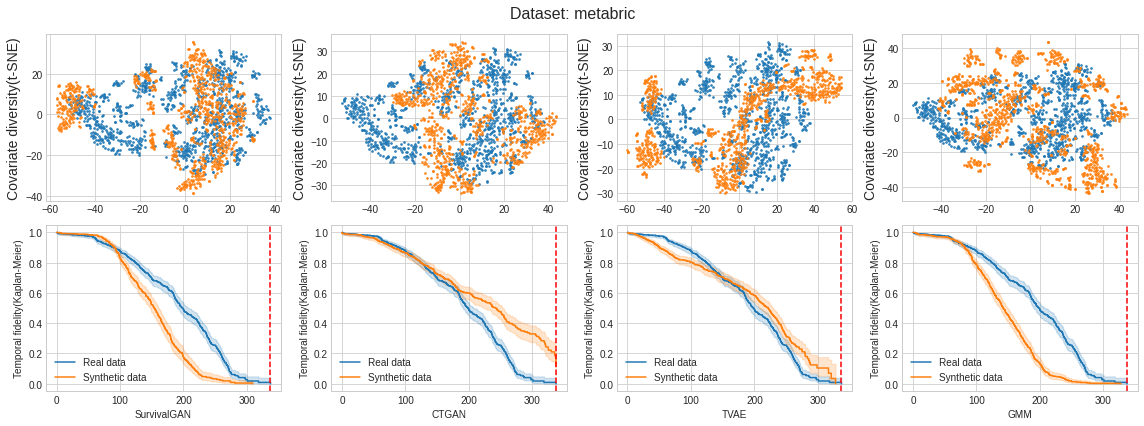

In [11]:
methods = ["survival_gan", "ctgan", "tvae", "gmm"]

for ref_df in ["metabric"]:
    plot_2d(ref_df, methods, repeat_id=0)

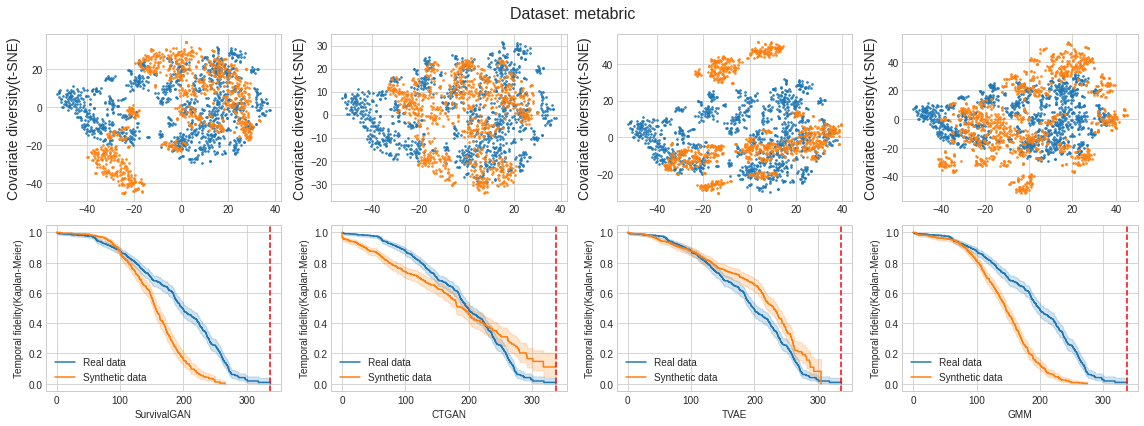

In [12]:
for ref_df in ["metabric"]:
    plot_2d(ref_df, methods, repeat_id=1)

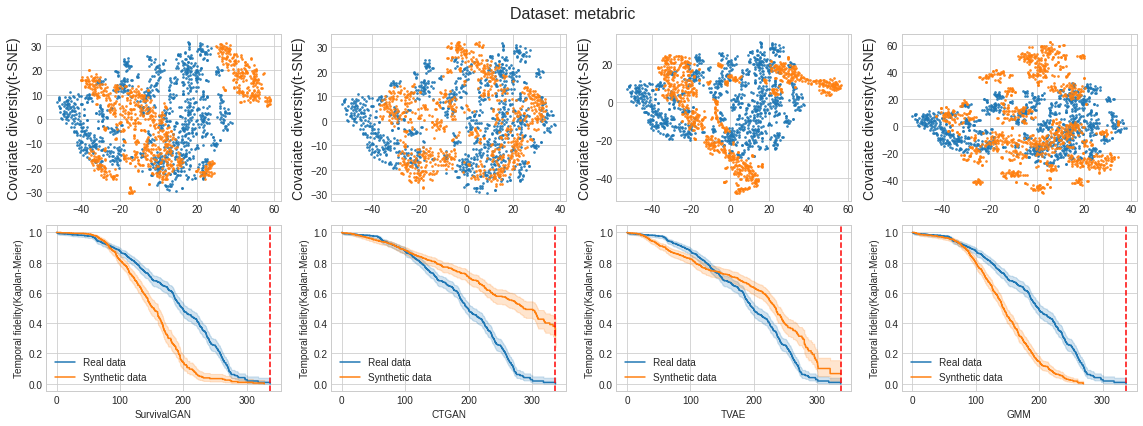

In [13]:
for ref_df in ["metabric"]:
    plot_2d(ref_df, methods, repeat_id=2)

In [10]:
from pathlib import Path

from adjutorium.utils.metrics import generate_score, print_score
from synthcity.benchmark import Benchmarks
from synthcity.metrics.eval_statistical import SurvivalKMDistance
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader
from synthcity.utils.serialization import dataframe_hash, load_from_file, save_to_file

out_dir = Path("workspace_rebuttal")

dataloader = SurvivalAnalysisDataLoader(
    df,
    target_column=event_col,
    time_to_event_column=duration_col,
    time_horizons=time_horizons,
)
df_hash = dataframe_hash(df)


def eval_survival_metrics(
    models: list, **kwargs,
):
    for idx, model in enumerate(models):
        optimism = []
        abs_optimism = []
        sightedness = []

        for repeat_id in range(3):
            model_bkp = out_dir / f"{df_hash}_{model}_{model}__{repeat_id}.bkp"
            syn_df = load_from_file(model_bkp)
            try:
                syn_df = syn_df.dataframe()
            except:
                pass

            syn_loader = SurvivalAnalysisDataLoader(
                syn_df,
                target_column=event_col,
                time_to_event_column=duration_col,
                time_horizons=time_horizons,
            )
            score = SurvivalKMDistance(task_type="survival_analysis").evaluate(
                dataloader, syn_loader
            )
            optimism.append(score["optimism"])
            abs_optimism.append(score["abs_optimism"])
            sightedness.append(score["sightedness"])
        print(">>>> Model", model)
        print("         optimism", print_score(generate_score(optimism)))
        print("         abs_optimism", print_score(generate_score(abs_optimism)))
        print("         sightedness", print_score(generate_score(sightedness)))

In [11]:
models = ["survival_gan", "ctgan", "tvae", "gmm"]

eval_survival_metrics(models)

>>>> Model survival_gan
         optimism -0.113 +/- 0.005
         abs_optimism 0.121 +/- 0.004
         sightedness 0.108 +/- 0.087
>>>> Model ctgan
         optimism 0.083 +/- 0.089
         abs_optimism 0.123 +/- 0.043
         sightedness 0.0 +/- 0.0
>>>> Model tvae
         optimism 0.04 +/- 0.019
         abs_optimism 0.068 +/- 0.014
         sightedness 0.041 +/- 0.045
>>>> Model gmm
         optimism -0.14 +/- 0.003
         abs_optimism 0.141 +/- 0.003
         sightedness 0.138 +/- 0.087
